In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit

In [3]:
qc=QuantumCircuit.from_qasm_file('P4_golden_mountain.qasm')

In [40]:
# qc.measure_all() # remove measurements to get the full state

# Create an Aer simulator configured for MPS simulation
simulator = AerSimulator(method="matrix_product_state",
                         matrix_product_state_max_bond_dimension=128, shots=10000, matrix_product_state_truncation_threshold=1e-16)


# tcirc=transpile(qc, simulator)
# # Execute the circuit on the qasm simulator
result = simulator.run(qc).result()


In [41]:
counts = result.get_counts(qc)

In [42]:

max=0
for i in counts:
    if counts[i]>max:
        max=counts[i]
        max_key=i
        
print("Max key: ", max_key)
print("Count:", max)

ctr=0
for i in counts:
    if counts[i]==max:
        ctr+=1
print(ctr)

Max key:  101111000000011010110010001010000100000110111011 101111000000011010110010001010000100000110111011 101111000000011010110010001010000100000110111011 101111000000011010110010001010000100000110111011
Count: 1
10000


In [36]:
import heapq
heap = []
for item in counts:
    value = item[1]  # assuming item = (key, value)
    if len(heap) < 100:
        heapq.heappush(heap, item)
    else:
        if value > heap[0][1]:  # min-heap: smallest value at root
            heapq.heappushpop(heap, item)

x=sorted(heap, key=lambda x: x[1], reverse=True)
print(x)

['010000001011100100000110101010111011000000100010 010000001011100100000110101010111011000000100010 010000001011100100000110101010111011000000100010 010000001011100100000110101010111011000000100010', '010000100011000100101001001111001110100000011011 010000100011000100101001001111001110100000011011 010000100011000100101001001111001110100000011011 010000100011000100101001001111001110100000011011', '010000011101011011111101100011110101100011001101 010000011101011011111101100011110101100011001101 010000011101011011111101100011110101100011001101 010000011101011011111101100011110101100011001101', '010011000111101010101101010111100110110110011101 010011000111101010101101010111100110110110011101 010011000111101010101101010111100110110110011101 010011000111101010101101010111100110110110011101', '010011001101010010001110010001000000011010101001 010011001101010010001110010001000000011010101001 010011001101010010001110010001000000011010101001 010011001101010010001110010001000000011010101001', '010

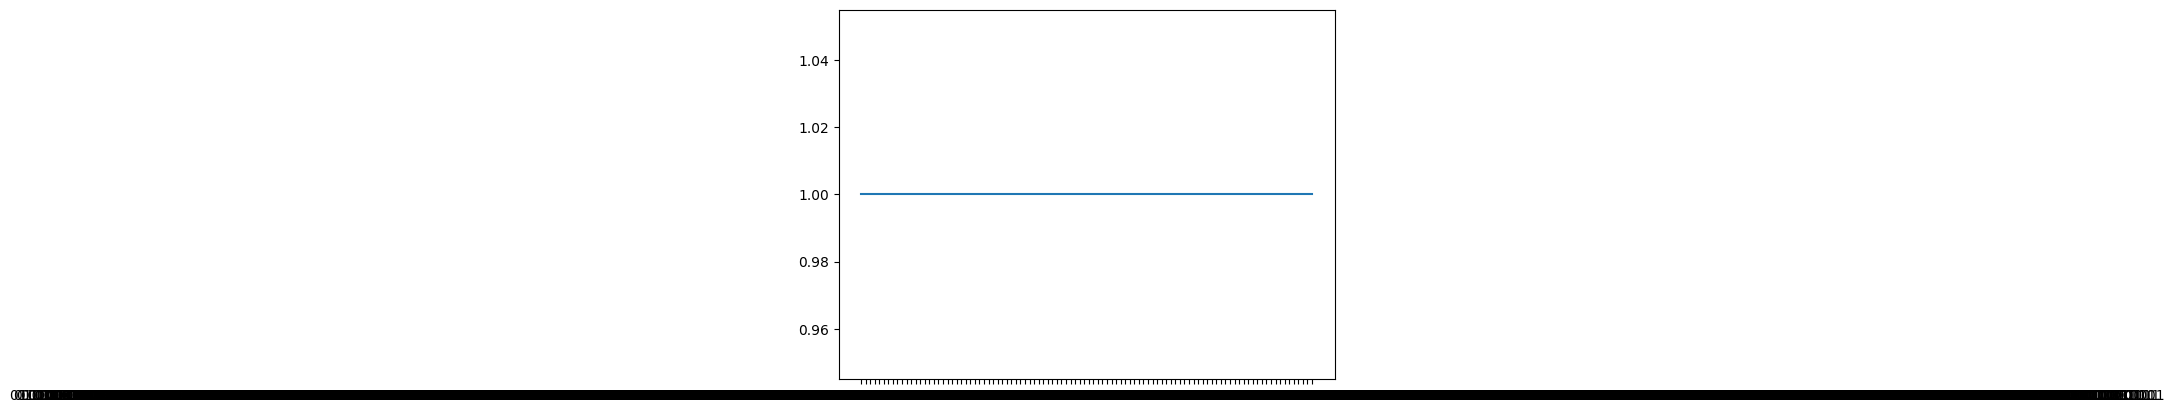

In [39]:
y=[counts[i] for i in x]
plt.plot(x,y)